In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
v = np.linspace(-100, 20, 500)
print(v)

[-1.00000000e+02 -9.97595190e+01 -9.95190381e+01 -9.92785571e+01
 -9.90380762e+01 -9.87975952e+01 -9.85571142e+01 -9.83166333e+01
 -9.80761523e+01 -9.78356713e+01 -9.75951904e+01 -9.73547094e+01
 -9.71142285e+01 -9.68737475e+01 -9.66332665e+01 -9.63927856e+01
 -9.61523046e+01 -9.59118236e+01 -9.56713427e+01 -9.54308617e+01
 -9.51903808e+01 -9.49498998e+01 -9.47094188e+01 -9.44689379e+01
 -9.42284569e+01 -9.39879760e+01 -9.37474950e+01 -9.35070140e+01
 -9.32665331e+01 -9.30260521e+01 -9.27855711e+01 -9.25450902e+01
 -9.23046092e+01 -9.20641283e+01 -9.18236473e+01 -9.15831663e+01
 -9.13426854e+01 -9.11022044e+01 -9.08617234e+01 -9.06212425e+01
 -9.03807615e+01 -9.01402806e+01 -8.98997996e+01 -8.96593186e+01
 -8.94188377e+01 -8.91783567e+01 -8.89378758e+01 -8.86973948e+01
 -8.84569138e+01 -8.82164329e+01 -8.79759519e+01 -8.77354709e+01
 -8.74949900e+01 -8.72545090e+01 -8.70140281e+01 -8.67735471e+01
 -8.65330661e+01 -8.62925852e+01 -8.60521042e+01 -8.58116232e+01
 -8.55711423e+01 -8.53306

In [7]:
c_m=10
v_zero=-65
m_zero=0.0529
h_zero=0.5961
n_zero=0.3177
g_l=0.003
g_k=0.360
g_na=1.200
E_l=-54.387
E_k=-77
E_na=50
delta_t=0.0001
z=200
#time_step = 100

In [8]:
def infFunction(alpha, beta):
    inf = alpha/(alpha+beta)
    return inf

def tauFunction(alpha, beta):
    tau = 1/(alpha+beta)
    return tau

def myFunction(n,inf,delta_t,tau):
    new = n + ((inf - n)*delta_t)/tau
    return new

def voltage(v,i_m,z,c_m):
    v_new = v - (i_m-z)*delta_t*(1/c_m)
    return v_new

In [1]:
T=100
vs = np.zeros(T)
ns = np.zeros(T)
ms = np.zeros(T)
hs = np.zeros(T)

vs[0] = v_zero
ns[0] = n_zero
ms[0] = m_zero
hs[0] = h_zero

n_vector = np.zeros(3)
m_vector = np.zeros(3)
h_vector = np.zeros(3)

for i in range(1,T):
   
    alpha_n = 10000*(vs[i-1]+0.055)/(1-np.exp(-100*(vs[i-1]+0.055)))
    beta_n = 125000*np.exp(-12.5*(vs[i-1]+0.065))

    tau_n = tauFunction(alpha_n, beta_n)
    n_inf = infFunction(alpha_n, beta_n)
    n_new = myFunction(ns[i-1],n_inf,delta_t,tau_n)
    
    n_vector[0] = tau_n
    n_vector[1] = n_inf
    n_vector[2] = n_new
    print(n_vector)
    
    ns[i] = n_new
    
    #Calculate m
    alpha_m = 100000*(vs[i-1]+0.040)/(1-np.exp(-100*(vs[i-1]+0.040)))
    beta_m = 4000000*np.exp(-55.6*(vs[i-1]+0.065))

    tau_m = tauFunction(alpha_m, beta_m)
    m_inf = infFunction(alpha_m, beta_m)
    m_new = myFunction(ms[i-1],m_inf,delta_t,tau_m)

    m_vector[0] = tau_m
    m_vector[1] = m_inf
    m_vector[2] = m_new
    print(m_vector)
    
    ms[i]= m_new
    
    #Calculate h
    alpha_h = 70000*np.exp(-50*(vs[i-1]+0.065))
    beta_h = 1000000/(1+np.exp(-100*(vs[i-1]+0.035)))

    tau_h = tauFunction(alpha_h, beta_h)
    h_inf = infFunction(alpha_h, beta_h)
    h_new = myFunction(hs[i-1],h_inf,delta_t,tau_h)

    
    h_vector[0] = tau_h
    h_vector[1] = h_inf
    h_vector[2] = h_new
    print(h_vector)

    hs[i]= h_new
    
    i_m = g_l*(vs[i-1]-E_l) + g_k*(ns[i-1]**4)*(vs[i-1]-E_k) + g_na*(ms[i-1]**3)*hs[i-1]*(vs[i-1]-E_na)
    vs[i] = voltage(vs[i-1],i_m,z,c_m)
    print(vs[i])

NameError: name 'np' is not defined

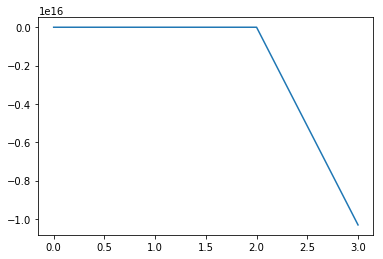

In [10]:
plt.plot(vs)